# Transformations isométriques

Dans le monde du calcul vectoriel (ou matriciel) on parle d'automophisme orthogonal plutôt que de transformation isométrique comme on
le verra à la fin.

# Isometric transformations

In the world of vector (or matrix) calculus, we speak of orthogonal automophism rather than of isometric transformation as we
will see it at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
angle = np.array([θ for θ in np.linspace(-np.pi/2,np.pi/2,7)])
shape1 = np.concatenate([np.array([np.cos(angle), np.sin(angle)]), \
                         np.array([[-0.5, -1, -1, -1], [1, 1, 0.5, 0]]), \
                         np.array([[-0.5, 0], [-0.5, -1]])], axis=1)
print(shape1)

[[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]]


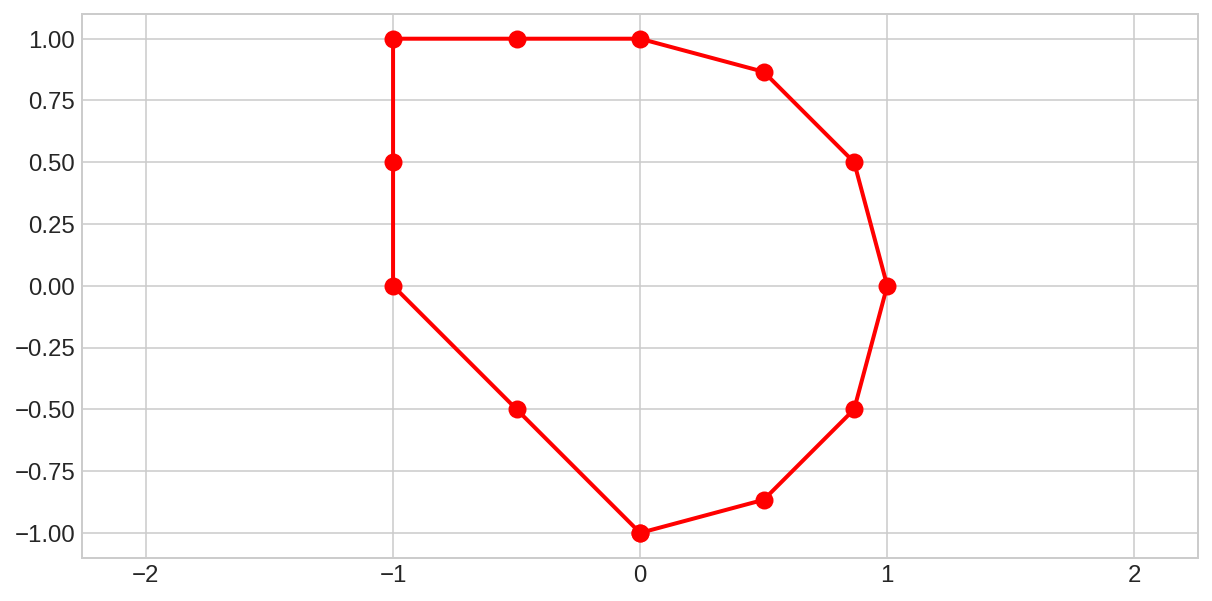

In [6]:
plt.plot(shape1[0], shape1[1], '-or')
plt.axis('equal');

## Matrice de rotation centrée en (0,0)

R = 
$
\begin{bmatrix}
cos(θ) & -sin(θ) \\
sin(θ) & cos(θ)  \\
\end{bmatrix}
$

### Propriétés

* Effectue une rotation de centre (0,0) et d'angle θ
* Déterminant = 1
* Matrice orthogonale $\rightarrow$ pas de déformation ni d'agrandissement de la forme (automorphisme orthogonal)

## Rotation matrix centered at (0,0)

R=
$
\begin{bmatrix}
cos(θ) & -sin(θ) \\
sin(θ) & cos(θ)  \\
\end{bmatrix}
$

### Properties

* Performs a rotation with center (0,0) and angle θ
* Determinant = 1
* orthogonal matrix $\rightarrow$ no shape deformation or enlargement (orthogonal automorphism)

[[ 0.707 -0.707]
 [ 0.707  0.707]]


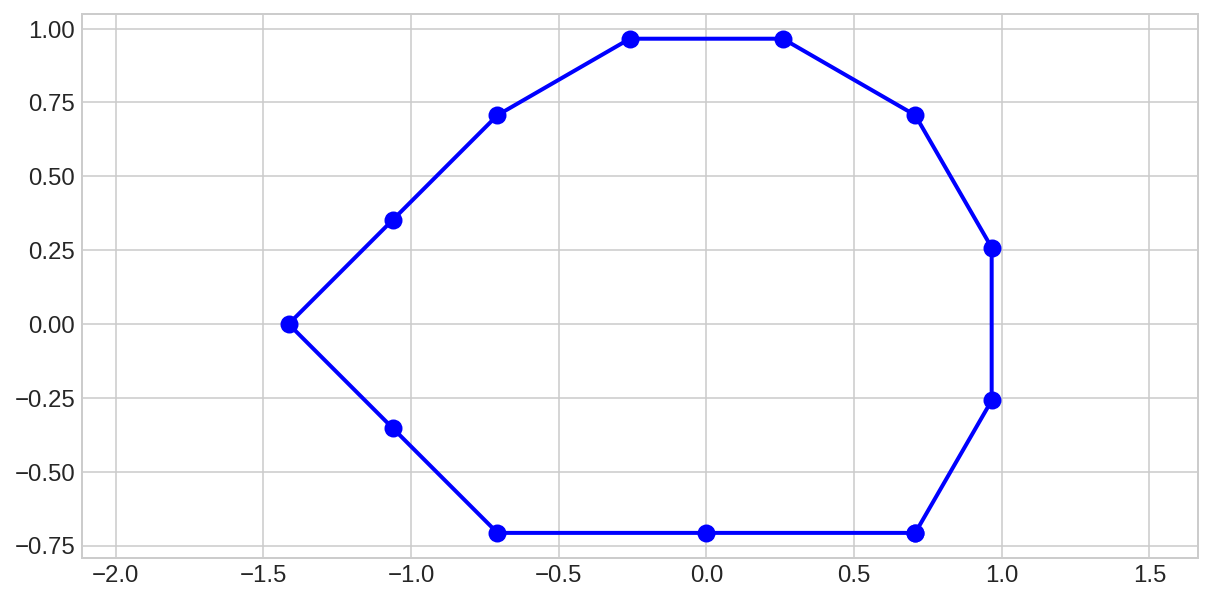

In [4]:
θ = np.pi / 4

R = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
print(R)

shape2 = R @ shape1

plt.plot(shape2[0], shape2[1], '-ob')
plt.axis('equal');

np.save("mouse.npy", shape2) # pour le prochain cours

Matrice orthogonale donc (par définition) $R.R^T = \textrm{Id}$

Orthogonal matrix so (by definition) $R.R^T = \textrm{Id}$

In [5]:
R @ R.T

array([[1., 0.],
       [0., 1.]])

Donc la transposée est la rotation d'angle -θ ce qui est logique puisque sinus est une fonction impaire.

So the transpose is the rotation of angle -θ which is logical since sine is an odd function.

## Symétrie axiale

La symétrie horizontale, qui transforme (a,b) en (a,-b), est 

Sx = 
$
\begin{bmatrix}
1 & 0 \\
0 & -1  \\
\end{bmatrix}
$

On voit donc que pour avoir une symétrie axiale par rapport à une droite qui passe par (0,0) il suffit de 

* faire une rotation pour mettre l'axe de symétrie à l'horizontale
* appliquer la symétrie horizontale
* faire la rotation inverse

Ainsi la symétrie axiale par rapport à la droite qui passe en (0,0) et qui a un angle d'alpha est :

$S = R_{-α}^{-1}\; Sx\; R_{-α} = R_α\;Sx\; R_{-α}$

Notez que l'ordre des matrices est l'inversé puisqu'on applique les points **x** à droite de $S$. 

## Axial Symmetry

The horizontal symmetry, which transforms (a,b) into (a,-b), is

Sx =
$
\begin{bmatrix}
1 & 0 \\
0 & -1  \\
\end{bmatrix}
$

We therefore see that to have an axial symmetry with respect to a straight line which passes through (0,0) it suffices to

* rotate to put the axis of symmetry horizontal
* apply horizontal symmetry
* do the reverse rotation

Thus the axial symmetry with respect to the straight line which passes through (0,0) and which has an angle of alpha is:

$S = R_{-α}^{-1}\; Sx\; R_{-α} = R_α\;Sx\; R_{-α}$

Note that the order of the matrices is the reverse since we apply the points **x** to the right of $S$.

[[-0.766  0.643]
 [ 0.643  0.766]]


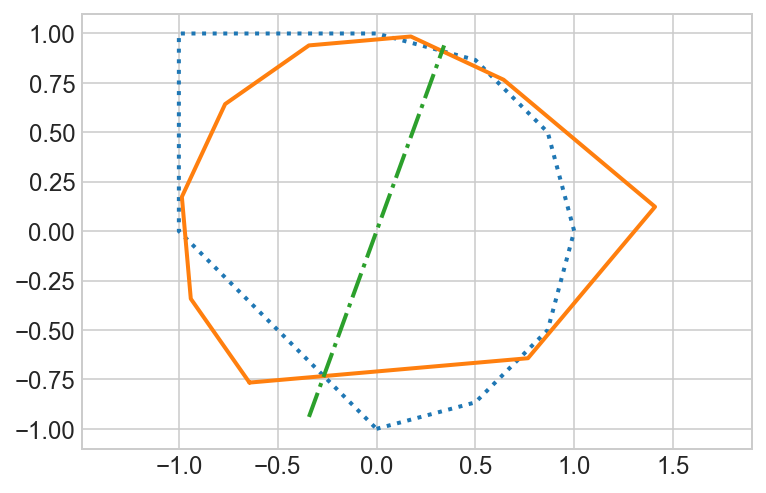

In [6]:
def Rα(α):
    return np.array([[np.cos(α), -np.sin(α)], [np.sin(α), np.cos(α)]])

Sx = np.array([[1, 0],[0,-1]])

θ = 70 * (2 * np.pi)/360  # 70 degrés

shape2 = Rα(θ) @ Sx @ Rα(-θ) @ shape1

print(Rα(θ) @ Sx @ Rα(-θ))

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.plot([-np.cos(θ),np.cos(θ)],[-np.sin(θ),np.sin(θ)],"-.")  # axe de symétrie
plt.axis('equal');

In [7]:
θ = np.pi / 4
Rα(θ) @ Sx @ Rα(-θ)

array([[ 0.,  1.],
       [ 1., -0.]])

Je ne sais pas s'il y a une formule directe plus simple pour avoir la symétrie axiale par rapport à une droite quelconque qui passe par (0,0).

I don't know if there is a simpler direct formula to have the axial symmetry with respect to any line that passes through (0,0).

## Translation

On ne peut pas exprimer la translation avec un produit matriciel car ce n'est pas une application linéaire :

$T(2\;\textbf{x}) \ne 2\; T(\textbf{x})$

Ce n'est pas non plus une transformation isométrique car la distance d'un point à (0,0) change après une translation.

D'un point de vue vectoriel une translation est une addition :

$T(\textbf{x}) = \textbf{x} + \textbf{v}_t$ 

Il existe un truc pour exprimer les translations sous forme de produit matriciel : on change la représentation des points :

$\textbf{x} = (x_1, x_2)$ devient $\textbf{x} = (x_1, x_2, 1)$

Ainsi la translation par le vecteur $(v_1, v_2)$ est 

$T(X) = 
\begin{bmatrix}
1 & 0 & v_1\\
0 & 1 & v_2 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
$

On peut vérifier que $T$ est bien une application linéraire puisque $T(2\;\textbf{x}) = 2\; T(\textbf{x})$ mais à l'arrivée
le nouveau point ne respecte pas la convention $(x_1, x_2, 1)$.

## Translation

We cannot express the translation with a matrix product because it is not a linear map:

$T(2\;\textbf{x}) \ne 2\; T(\textbf{x})$

It is also not an isometric transformation because the distance from a point to (0,0) changes after a translation.

From a vector point of view a translation is an addition:

$T(\textbf{x}) = \textbf{x} + \textbf{v}_t$

There is a trick to express the translations in the form of a matrix product: we change the representation of the points:

$\textbf{x} = (x_1, x_2)$ becomes $\textbf{x} = (x_1, x_2, 1)$

Thus the translation by the vector $(v_1, v_2)$ is

$T(X) = 
\begin{bmatrix}
1 & 0 & v_1\\
0 & 1 & v_2 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
$

We can verify that $T$ is indeed a linear application since $T(2\;\textbf{x}) = 2\; T(\textbf{x})$ but on arrival
the new point does not follow the $(x_1, x_2, 1)$ convention.

Translate matrix:
 [[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]
Shape1 3d:
 [[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]]


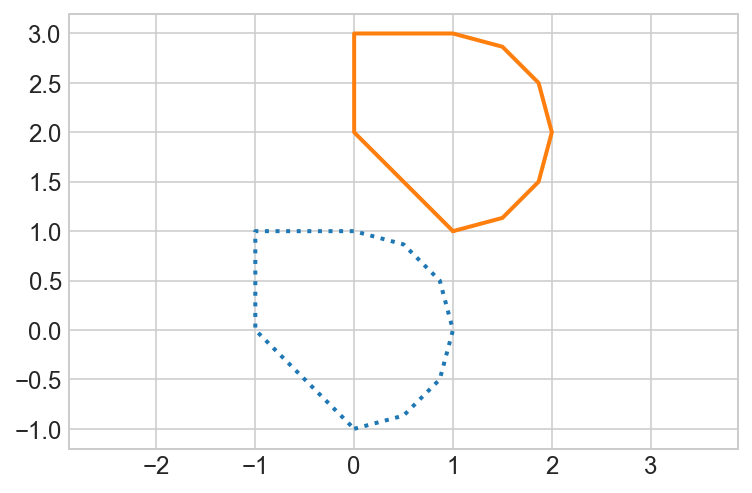

In [8]:
v = np.array([1,2])

T = np.identity(3)
T[0:2,2] = v
print("Translate matrix:\n", T)

shape1_3d = np.concatenate([shape1, np.ones((1, len(shape1[0])))], axis=0)
print("Shape1 3d:\n", shape1_3d)

shape2 = T @ shape1_3d

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.axis('equal');

La matrice inverse de notre matrice de translation est celle qui remet la forme orange à sa place d'origine, donc qui applique la transaltion $-\textbf{v} = (-1,-2)$.

$T^{-1} = 
\begin{bmatrix}
1 & 0 & -1\\
0 & 1 & -2 \\
0 & 0 & 1 \\
\end{bmatrix}
$

ce qui n'est pas la transposée de T donc T n'est pas orthogonale.

Le piège est qu'il y a 2 types d'isométries :

* l'isométrie vectorielle ou automorphisme orthogonal qui veut que $\forall\, \textbf{x}, \;||\textbf{f}(\textbf{x})|| = ||\textbf{x}||$ ainsi que la conservation des angles
* l'isométrie géométrique qui veut que $\forall\, \textbf{a}, \textbf{b}, \; ||\textbf{f}(\textbf{a}) - \textbf{f}(\textbf{b})|| = ||\textbf{a} - \textbf{b}||$.

La translation est bien une isométrie géométrique mais pas vectorielles d'où le fait qu'on préfère parler
d'automorphisme orthogonal plutôt que d'isométrie pour ne pas prêter à confusion.

The inverse matrix of our translation matrix is ​​the one that puts the orange shape back in its original place, so that applies the $-\textbf{v} = (-1,-2)$ transaction.

$T^{-1} = 
\begin{bmatrix}
1 & 0 & -1\\
0 & 1 & -2 \\
0 & 0 & 1 \\
\end{bmatrix}
$

which is not the transpose of T so T is not orthogonal.

The catch is that there are 2 types of isometries:

* vector isometry or orthogonal automorphism which requires that $\forall\, \textbf{x}, \;||\textbf{f}(\textbf{x})|| = ||\textbf{x}||$ as well as the conservation of angles
* the geometric isometry that wants $\forall\, \textbf{a}, \textbf{b}, \; ||\textbf{f}(\textbf{a}) - \textbf{f}(\textbf{b})|| = ||\textbf{a} - \textbf{b}||$.

The translation is indeed a geometric isometry but not vectorial hence the fact that we prefer to speak
orthogonal automorphism rather than isometry to avoid confusion.

## Exercice 1.1

Écrire sous forme d'un produit matriciel la symétrie axiale par rapport à un axe qui ne passe pas par (0,0).
On prendra l'axe qui passe par (2,0) et qui a un angle de π/3 par rapport à l'horizontale.

Est-ce un automorphisme orthogonal ? Le montrer.

## Exercise 1.1

Write in the form of a matrix product the axial symmetry with respect to an axis which does not pass through (0,0).
We will take the axis which passes through (2,0) and which has an angle of π/3 with respect to the horizontal.

Is it an orthogonal automorphism? Show it.